# Predict the popularity of future Airbnb listenings in NYC

This project will use machine learning to predict the popularity of future Airbnb listings. The predicting variable will be reviews_per_month as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, to perhaps guide hosts to create listings that are more appealing.

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [44]:
# Downloading data set 
airbnb_df = pd.read_csv("AB_NYC_2019.csv", index_col=0)
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


The column we care about reviews per month values are very small. hovering around 1. The data set is sizable however, around 50000 examples which is good as it gives us ample data to work with and split upon. Some of the features I can see their direct correlations and impact on reviews per month, such as number of reviews, price, maybe the room type and neighborhoods. 

In [45]:
from sklearn.model_selection import train_test_split
from IPython.display import HTML

#replace rows with NaN as with 0 instead
airbnb_df['reviews_per_month'].fillna(0, inplace=True)

train_df, test_df = train_test_split(airbnb_df, test_size=0.3, random_state=123)

In [46]:
# Performing ED
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [47]:
airbnb_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [48]:
airbnb_df["reviews_per_month"].median()

0.37

In [49]:
airbnb_df["reviews_per_month"].mean()

1.0909099089886491

In [50]:
airbnb_df["reviews_per_month"].std()

1.597282767418371

Since our target is the feature of reviews per month, a good feature to take a look at would be the number of reviews since both are review based
Looking at the mean and median number of reviews we can see that there is not much variance between the mean and median. The median being 0.72 reviews and the mean being approximately 1.37 . This means most airbnbs are getting at most 1 review per month. Looking at the std however, we see that its greater than the mean, meaning its possible that many airbnbs don't get any reviews at all most of the time. 

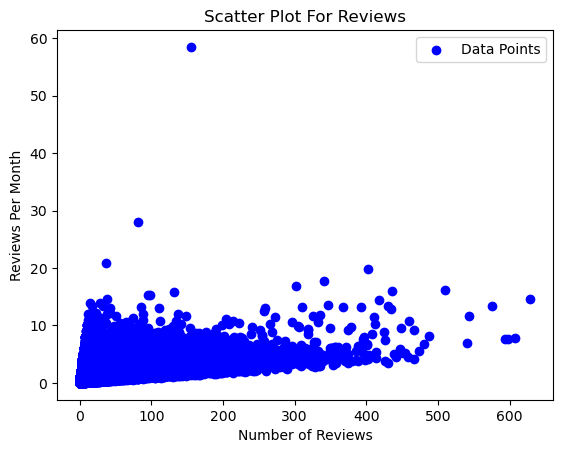

In [51]:
import matplotlib.pyplot as plt

plt.scatter(airbnb_df["number_of_reviews"], airbnb_df["reviews_per_month"], label='Data Points', color='b', marker='o')

plt.title('Scatter Plot For Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews Per Month')
plt.legend()
plt.show()

For this scatter plot, we see that there are indeed some outliers that are affecting our data especially the one at the top of the 
plot with 60 reviews per month, but a low number of reviews. There is a slow positive slope meaning there is a positive correlation between the two features.

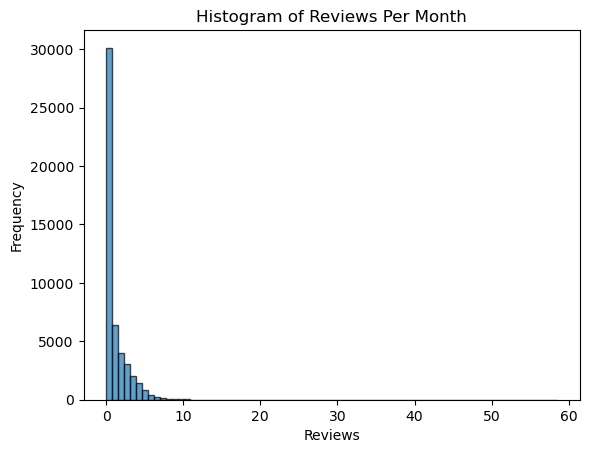

In [52]:
plt.hist(airbnb_df["reviews_per_month"], bins=75, edgecolor='k', alpha=0.7)

plt.title('Histogram of Reviews Per Month')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

Here we see that the number of reviews being left are quite sparse with each place only being left a tiny amount of reviews per month 

array([[<Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

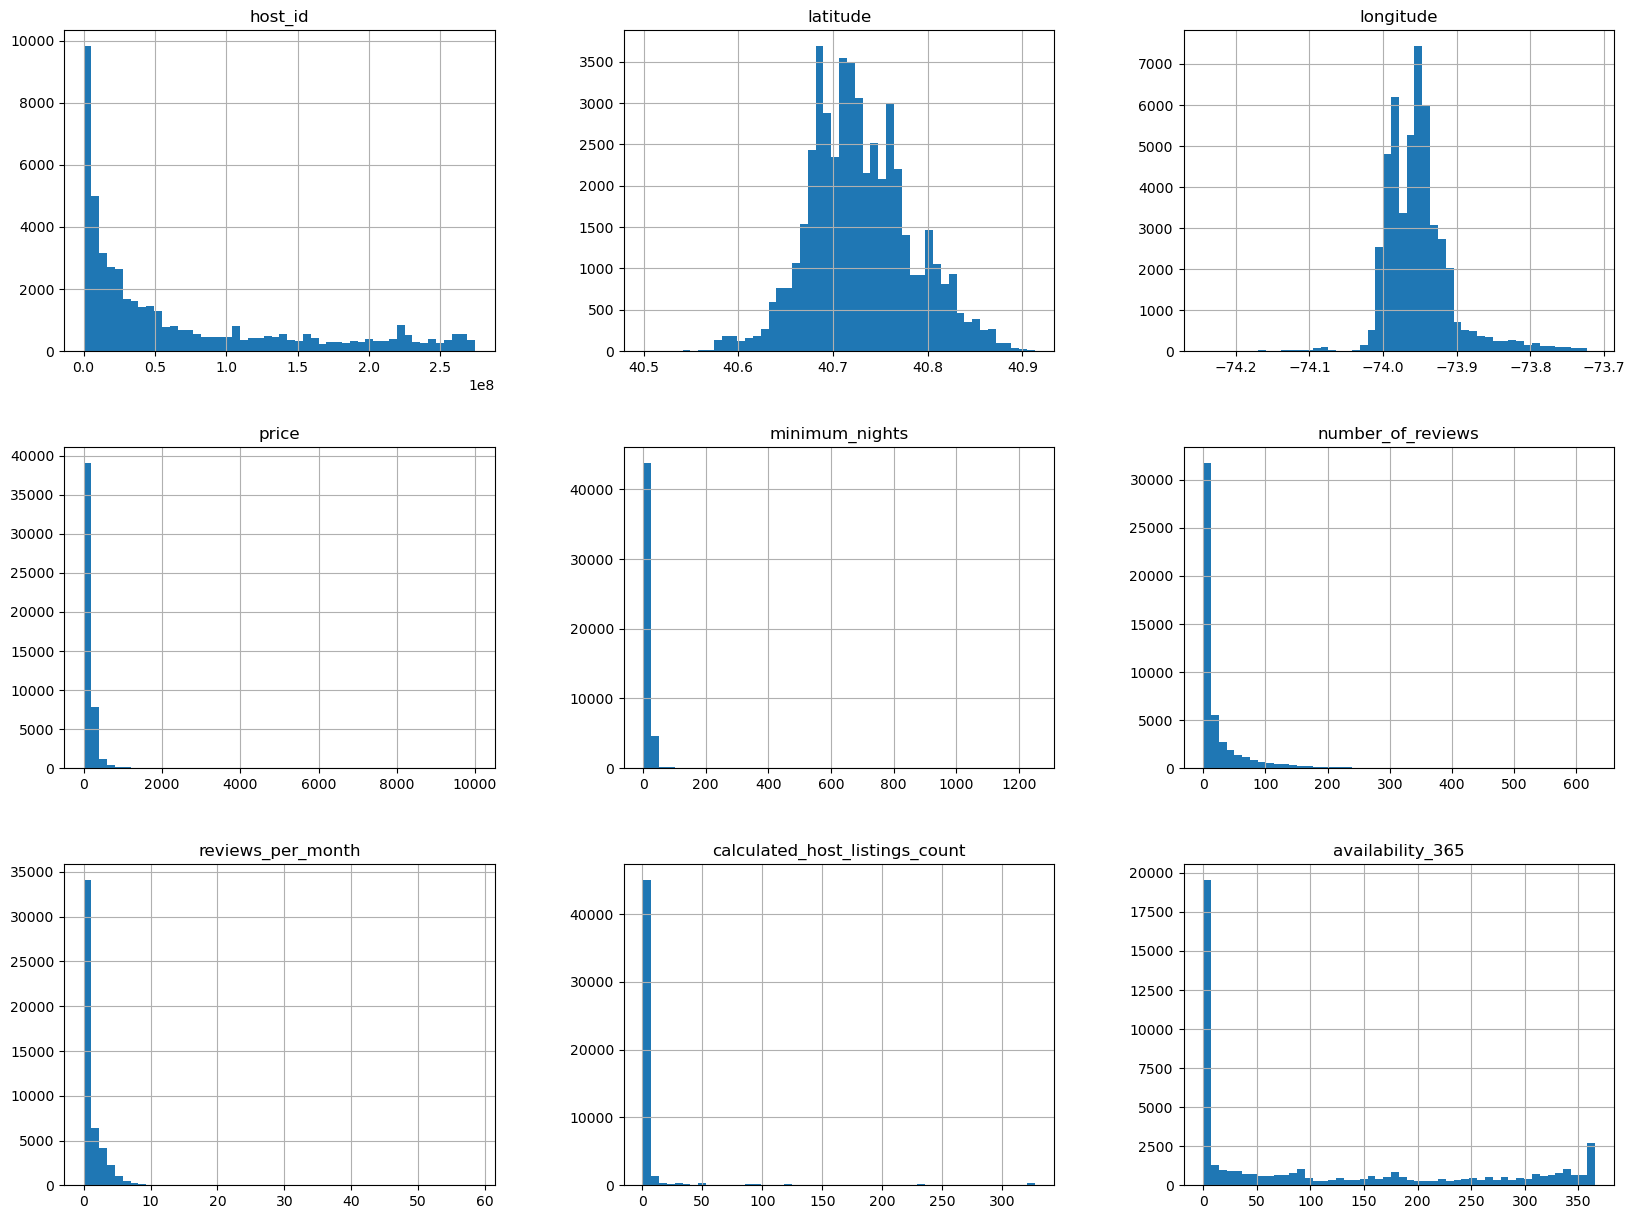

In [53]:
airbnb_df.hist(bins=50, figsize=(20,15))

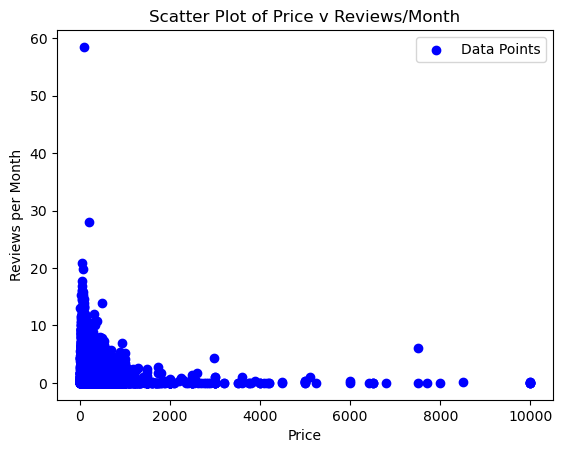

In [54]:
plt.scatter(airbnb_df["price"], airbnb_df["reviews_per_month"], label='Data Points', color='b', marker='o')

plt.title('Scatter Plot of Price v Reviews/Month')
plt.xlabel('Price')
plt.ylabel('Reviews per Month')
plt.legend()

plt.show()

Here it seems like the price affects the number of reviews per month pretty. Intuitively, the lower priced places have more reviews per month
since they are probably more affordable. 

Initial Observations about data
- It seems like reviews per month has a small range it can vary over. Looking at the histogram we see that many get little to no reviews per month, and is directly influenced by other numerical features such as total number of reviews and price. The extremely large number of 0 reviews per month maybe problematic since there is not much variation in target values for the training set.

Metrics for assessment
- This is pretty much a regression problem since we care about the reviews per month and its not a discrete value. For these types of problems, it is best to use MAPE, MSE, RMSE and R^2 as our metrics of assessment. 

### Feature Engineering

For new features, we will be using the minimum price per night by multiplying the price by minimum nights. This will give us some insights on how the minimum amount spent per place will affect the number of reviews it receives per month

In [55]:
train_df = train_df.assign(
    minimum_total_price = train_df['price'] * train_df['minimum_nights']
)

test_df = test_df.assign(
    minimum_total_price = test_df['price'] * test_df['minimum_nights']
)

In [56]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month              

### Preprocessing and transformations

Scaling: price, min_nights, average price per night 

Categorical for OHE: host_name, neighbourhood_group, neighourhood, room_type

In [57]:
X_train = train_df.drop(columns=["reviews_per_month"])
y_train = train_df["reviews_per_month"].fillna(0)

X_test = test_df.drop(columns=["reviews_per_month"])
y_test = test_df["reviews_per_month"].fillna(0)

In [58]:
numeric_features = ["price", "minimum_nights", "minimum_total_price", "calculated_host_listings_count"]
categorical_features = ["neighbourhood_group", "neighbourhood", "room_type"]
drop_features = ["number_of_reviews", "name", "last_review", "host_id", "host_name", "latitude", "longitude"]
# passthrough_features = []

Here we are scaling the price, minimum_nights, minimum_total_price, calculated_host_listings_count, and calculated_host_listings_count. We are dropping number of reviews as stated in the problem statement, host_name, name and host id since the people or the listing name of the place is irrelevant in our model. The last_review doesn't have any intuitive correlation to reviews per month, longitude and latitude are also dropped since we are focused on New York. Everything else will be OneHotEncoded.  

In [59]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

scale_transformer = make_pipeline(
    StandardScaler()
)
categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocessor = make_column_transformer(
    (scale_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features, "all"),
)

preprocessor.fit_transform(X_train)
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False,
                                sparse_output=False))]),
 'drop': 'drop',
 'remainder': 'drop'}

In [60]:
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
)
new_columns = (
    numeric_features + ohe_columns
)

In [61]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc

,price,minimum_nights,minimum_total_price,calculated_host_listings_count,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,
28736148,-0.234668,-0.143631,-0.089234,-0.185406,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34613254,-0.006459,1.062979,0.341446,0.397589,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11144496,0.204846,-0.282855,-0.108486,-0.185406,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
766814,-0.238895,-0.282855,-0.119473,-0.185406,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16162621,0.200620,-0.190039,-0.066946,-0.185406,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885201,-0.238895,1.062979,0.168797,0.121433,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12325045,-0.052946,-0.236447,-0.100325,-0.185406,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13915004,0.416151,-0.190039,-0.050937,-0.185406,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Baseline model

In [62]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, cross_validate

dummy = DummyRegressor()
pd.DataFrame(cross_validate(dummy, X_train, y_train, cv=10, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.006981,0.000997,-0.000024,0.0
1,0.005982,0.000998,-0.000029,0.0
2,0.004985,0.000999,-0.000272,0.0
3,0.005986,0.001229,-0.000069,0.0
4,0.007978,0.001016,-0.000295,0.0
5,0.005985,0.001012,-0.000198,0.0
6,0.004987,0.000998,-0.000167,0.0
7,0.005984,0.001009,-0.000039,0.0
8,0.008976,0.000997,-0.000525,0.0
9,0.003989,0.000996,-0.002474,0.0


For the Dummy Regressor, we see that the train scores and test scores are quite low. This could be due to the nature of the regression problem and that the dummy regressor cant seem to figure out the algorithm for number of reviews per month. 

### Linear model

In [63]:
from sklearn.linear_model import Ridge, RidgeCV

best_score = 0

results_dict = {
    "alpha": 10.0 ** np.arange(-4, 7, 1), # try larger range?
    "mean_train_score": list(), 
    "mean_cv_score": list(),
}

for alpha in results_dict["alpha"]:
    pipe = make_pipeline(preprocessor, Ridge(alpha=alpha))
    scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
    results_dict["mean_train_score"].append(scores["train_score"].mean())
    results_dict["mean_cv_score"].append(scores["test_score"].mean())

results_df = pd.DataFrame(results_dict)

In [64]:
results_df

,alpha,mean_train_score,mean_cv_score
0,0.0001,0.086083,0.068539
1,0.0010,0.086083,0.068541
2,0.0100,0.086083,0.068562
3,0.1000,0.086078,0.068755
4,1.0000,0.085872,0.069911
5,10.0000,0.083546,0.072056
6,100.0000,0.071369,0.065594
7,1000.0000,0.046064,0.043767
8,10000.0000,0.025672,0.024817
9,100000.0000,0.009010,0.008865


Here for our Ridge model, we see some improvements for the R^2 scores but they are still close to 0. This would mean that the linear model is not very good at scoring this particular problem. We also see that alphas below 0.01 seems to have the best train score, whereas the peak Cv score comes in at alpha = 10. the train score is not much worse than its >0.01 counterparts. 

### Other Models

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
# look at mse or mape 


In [66]:
models = {
    "DecisionTree": DecisionTreeRegressor(),
    "kNN": KNeighborsRegressor(),
    "GradientBoost": GradientBoostingRegressor()
}

results_dict = {
    "models": list(),
    "mean_train_score": list(), 
    "mean_cv_score": list(),
}

for p, t in models.items():
    pipe = make_pipeline(preprocessor, t)
    scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
    results_dict["models"].append(p)
    results_dict["mean_train_score"].append(scores["train_score"].mean())
    results_dict["mean_cv_score"].append(scores["test_score"].mean())

results_df = pd.DataFrame(results_dict)


In [67]:
results_df

,models,mean_train_score,mean_cv_score
0,DecisionTree,0.785164,-0.287106
1,kNN,0.370143,0.067226
2,GradientBoost,0.210070,0.183826


The decision tree model is evidently overfitting with a mean tran score of 78% but a 28.59% mean cv score. If we look at the GradientBoost regressor, this model seems to be the most appropriate as it only has a roughly 3% difference between train and vc scores. 

### Feature selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfe_pipe = make_pipeline(
    preprocessor,
    RFECV(Ridge(), cv=10),
    GradientBoostingRegressor(),
)
pd.DataFrame(cross_validate(rfe_pipe, X_train, y_train, return_train_score=True)).mean()

Here after feature selection using RFE, we see there is an increase in train score at 21% and test score of 18%. While the improvement is not by any means large, it is improvement nonetheless. One thing to note however is how long it takes to do this step. This is most likely due to the fact that we're doing loops within loops. 

### Hyperparameter optimization

In [17]:
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(preprocessor, 
                     # RFECV(Ridge(), cv=10),
                     GradientBoostingRegressor()
                    )

param_dist = {
    "gradientboostingregressor__n_estimators": np.arange(1, 51, 5).tolist(),
    "gradientboostingregressor__max_features": np.arange(0.05, 1.05, 0.05).tolist(),
}

gs = RandomizedSearchCV(pipe,
                        param_dist,
                        n_iter=10,
                        cv=5,
                        n_jobs=-1,
                        return_train_score=True,
                        random_state=123,
                        )

In [18]:
gs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['price',
                                                                                'minimum_nights',
                                                                                'minimum_total_price',
                                                                                'calculated_host_listings_count']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse=Fals...
                   param_distributions={'gradientboostingregressor__max_features': [0.05,
                                                                                    0.1,
                                                                                    0.15000000000000002,
                                                                                    0.2,
                                                                                    0.25,
                                                                                    0.3,
                                                                                    0.35000000000000003,
                                                                                    0.4,
                                                                                    0.45,
                                                                                    0.5,
                                                                                    0.55,
                                                                                    0.6000000000000001,
                                                                                    0.6500000000000001,
                                                                                    0.7000000000000001,
                                                                                    0.7500000000000001,
                                                                                    0.8,
                                                                                    0.8500000000000001,
                                                                                    0.9000000000000001,
                                                                                    0.9500000000000001,
                                                                                    1.0],
                                        'gradientboostingregressor__n_estimators': [1,
                                                                                    6,
                                                                                    11,
                                                                                    16,
                                                                                    21,
                                                                                    26,
                                                                                    31,
                                                                                    36,
                                                                                    41,


In [19]:
gs.best_score_

0.17225148955884695

In [20]:
gs.best_params_

{'gradientboostingregressor__n_estimators': 46,
 'gradientboostingregressor__max_features': 0.9000000000000001}

In [21]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingregressor__n_estimators,param_gradientboostingregressor__max_features,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.487391,0.080285,0.087674,0.026133,1,0.3,"{'gradientboostingregressor__n_estimators': 1,...",0.015776,0.008724,0.011005,...,0.011411,0.003460,10,0.015649,0.009012,0.015750,0.007401,0.016103,0.012783,0.003774
1,20.089300,1.812048,0.134216,0.015673,36,0.65,{'gradientboostingregressor__n_estimators': 36...,0.177393,0.166233,0.138318,...,0.163503,0.013251,4,0.169243,0.177195,0.182840,0.172802,0.175824,0.175581,0.004544
2,7.538050,0.870548,0.157330,0.041214,36,0.2,{'gradientboostingregressor__n_estimators': 36...,0.165691,0.158931,0.136937,...,0.157394,0.010686,5,0.158113,0.167063,0.175485,0.161838,0.169311,0.166362,0.006015
3,32.876825,1.150253,0.203628,0.117455,46,0.75,{'gradientboostingregressor__n_estimators': 46...,0.185749,0.169637,0.147009,...,0.170253,0.012863,2,0.177794,0.186255,0.189725,0.183091,0.186412,0.184656,0.004022
4,6.307781,0.800963,0.149245,0.019752,46,0.1,{'gradientboostingregressor__n_estimators': 46...,0.154613,0.147600,0.130592,...,0.148815,0.009715,6,0.148655,0.158034,0.166266,0.155977,0.155045,0.156795,0.005679
5,12.716783,0.545023,0.131530,0.009341,21,0.55,{'gradientboostingregressor__n_estimators': 21...,0.158490,0.150753,0.126316,...,0.148170,0.011297,7,0.149784,0.157102,0.159602,0.151710,0.152476,0.154135,0.003640
6,47.088925,2.161071,0.118381,0.007457,46,0.9,{'gradientboostingregressor__n_estimators': 46...,0.187787,0.173595,0.145158,...,0.172251,0.014467,1,0.177011,0.187591,0.192686,0.184008,0.188289,0.185917,0.005239
7,8.971327,1.403792,0.185399,0.082531,16,0.3,{'gradientboostingregressor__n_estimators': 16...,0.141892,0.131239,0.110637,...,0.130911,0.010700,8,0.133231,0.135500,0.140639,0.131807,0.131446,0.134525,0.003373
8,9.918037,2.017158,0.112891,0.049757,11,0.85,{'gradientboostingregressor__n_estimators': 11...,0.127827,0.125610,0.105811,...,0.123522,0.009123,9,0.122768,0.127120,0.132589,0.124778,0.125413,0.126533,0.003332
9,19.278384,1.980735,0.050162,0.023559,41,0.8,{'gradientboostingregressor__n_estimators': 41...,0.186716,0.167928,0.142661,...,0.168190,0.014296,3,0.175702,0.181302,0.187264,0.177464,0.181732,0.180693,0.003999


In [22]:
param_grid2 = {
    "kneighborsregressor__n_neighbors": np.arange(1, 51, 5).tolist(),
}

pipe_knn = make_pipeline(preprocessor, KNeighborsRegressor())

gt = RandomizedSearchCV(pipe_knn,
                        param_grid2,
                        n_iter=10,
                        cv=5,
                        n_jobs=-1,
                        return_train_score=True,
                        random_state=123,
                        )

In [23]:
gt.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['price',
                                                                                'minimum_nights',
                                                                                'minimum_total_price',
                                                                                'calculated_host_listings_count']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['neighbourhood_group',
                                                                                'neighbourhood',
                                                                                'room_type']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['number_of_reviews',
                                                                                'name',
                                                                                'last_review',
                                                                                'host_id',
                                                                                'host_name',
                                                                                'latitude',
                                                                                'longitude'])])),
                                             ('kneighborsregressor',
                                              KNeighborsRegressor())]),
                   n_jobs=-1,
                   param_distributions={'kneighborsregressor__n_neighbors': [1,
                                                                             6,
                                                                             11,
                                                                             16,
                                                                             21,
                                                                             26,
                                                                             31,
                                                                             36,
                                                                             41,
                                                                             46]},
                   random_state=123, return_train_score=True)

In [24]:
gt.best_score_

0.15544375689926623

In [25]:
gt.best_params_

{'kneighborsregressor__n_neighbors': 36}

In [26]:
results2 = pd.DataFrame(gt.cv_results_)
results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.131387,0.009884,8.936833,1.645919,1,{'kneighborsregressor__n_neighbors': 1},-0.379250,-0.417553,-0.436053,-0.434325,...,-0.418742,0.020805,10,0.581504,0.603966,0.615434,0.588976,0.600144,0.598005,0.011813
1,0.198798,0.075502,11.811500,0.635044,6,{'kneighborsregressor__n_neighbors': 6},0.115434,0.043212,0.082984,0.091287,...,0.084099,0.023318,9,0.337426,0.350541,0.359477,0.337473,0.341026,0.345189,0.008602
2,0.299863,0.053045,12.646025,1.169527,11,{'kneighborsregressor__n_neighbors': 11},0.163726,0.111180,0.105403,0.148197,...,0.133468,0.022116,8,0.274839,0.283165,0.287708,0.275131,0.278785,0.279926,0.004924
3,0.358371,0.054732,13.443919,1.054816,16,{'kneighborsregressor__n_neighbors': 16},0.174885,0.137398,0.106736,0.156749,...,0.145465,0.022781,7,0.239360,0.250924,0.259915,0.241481,0.247835,0.247903,0.007316
4,0.383361,0.029959,14.560113,1.396184,21,{'kneighborsregressor__n_neighbors': 21},0.173276,0.137799,0.111174,0.164263,...,0.148783,0.022131,6,0.220895,0.226880,0.239188,0.222081,0.229737,0.227756,0.006552
5,0.332545,0.033590,13.845959,1.845955,26,{'kneighborsregressor__n_neighbors': 26},0.175623,0.153142,0.113321,0.164475,...,0.153326,0.021295,5,0.207032,0.214164,0.226293,0.210478,0.214286,0.214451,0.006499
6,0.389796,0.078832,14.132747,1.208121,31,{'kneighborsregressor__n_neighbors': 31},0.173006,0.157071,0.116509,0.168911,...,0.154751,0.020070,2,0.197738,0.206500,0.216473,0.201456,0.206502,0.205734,0.006305
7,0.335320,0.064387,13.373124,1.279221,36,{'kneighborsregressor__n_neighbors': 36},0.174682,0.155921,0.118941,0.167896,...,0.155444,0.019374,1,0.190987,0.199530,0.209264,0.195593,0.199662,0.199007,0.006031
8,0.346484,0.071489,12.383989,0.978961,41,{'kneighborsregressor__n_neighbors': 41},0.176696,0.155807,0.119566,0.166088,...,0.154698,0.019233,3,0.186119,0.195596,0.202914,0.190376,0.193280,0.193657,0.005607
9,0.388878,0.036424,15.800241,1.892766,46,{'kneighborsregressor__n_neighbors': 46},0.174087,0.153791,0.121231,0.166825,...,0.154026,0.018121,4,0.180673,0.190367,0.197037,0.183182,0.187562,0.187764,0.005729


We tried doing feature selection using RFECV but each iteration took way too long to actually see any results so we decided to remove it from our pipeline.

With RandomSearchCV hyperparameter tuning on n_estimators and max_features on our GradientBoostRegressor and n_neighbours for our kNN Regressor, we find that on our kNN model, we see an improvement in R^2 score of ~8%, with n_neighbours as 36. This is a moderate improvement, which could be further improved if we increased the ranges of our tuning. My initial thoughts were that the hypeparameter tuning would increase the cv scores by a factor of atleast 10-20% given that the initial tries had cv scores of 20%. As stated before this could be due to the value ranges not being wide enough. For GradientBoostRegression, it seems that the hyperparameter tuning did not actually do anything, it gave us a lower score than untuned ones (worse by ~3%). This could be due to a variety of reasons. One being the default values may have been the best ones, or second the range of values I tried was too restrictive (given my old laptop). Overall, the hyperparameter tuning has not be successful as I had hoped. 

### Interpretation of feature importances

In [27]:
# Most Important features on the decision tree regressor (non-linear)
pipe_dt = make_pipeline(preprocessor, DecisionTreeRegressor(max_depth=7))
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['price', 'minimum_nights',
                                                   'minimum_total_price',
                                                   'calculated_host_listings_count']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['neighbourhood_group',
                                                   'neighbourhood',
                                                   'room_type']),
                                                 ('drop', 'drop',
                                                  ['number_of_reviews', 'name',
                                                   'last_review', 'host_id',
                                                   'host_name', 'latitude',
                                                   'longitude'])])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=7))])

In [28]:
data = {
    "Importance": pipe_dt.named_steps["decisiontreeregressor"].feature_importances_,
}
pd.DataFrame(data=data, index=new_columns,).sort_values(
    by="Importance", ascending=False
)[:10]

,Importance
minimum_nights,0.418745
calculated_host_listings_count,0.189553
minimum_total_price,0.114864
neighbourhood_East Elmhurst,0.081593
neighbourhood_Springfield Gardens,0.040441
room_type_Entire home/apt,0.034530
price,0.031263
neighbourhood_group_Manhattan,0.020847
neighbourhood_Hell's Kitchen,0.014524
neighbourhood_group_Brooklyn,0.014103


Since we are not using a linear model, we cannot tell if a feature will make the prediction value increase or decrease. The above importance chart does tell us that minimum_nights plays a huge role in reviews per month, which makes sense since most people will be filtering for the number of nights they wish to stay rather than host, or price (minimum total price is third, but usually people look for the nights first). Then the next highest importance is from calculated_host_listing_count, this usually means that the host has other places that they list meaning they are usually trusted and will most likely not be a bad place to stay at. Regarding the types of neighbourhood, it seems like springfield gardens and east elmhurst have a lot of sway. It could be negative or positive but we wont know since we are not using a linear model. We also see that our engineered feature has quite a high importance meaning we may have hit the head on this specific feature. 

### Results 

In [29]:
pipe_gbr = make_pipeline(preprocessor, GradientBoostingRegressor(n_estimators=46, max_features=0.9000000000000001))

pipe_gbr.fit(X_train, y_train)
pipe_gbr.score(X_test, y_test)


0.16839916358763818

We used our best performing model with default hyperparameters, GradientBoostingRegressor, and scored it on our test data which gave us a 0.168. This is pretty close to the best score from the best score of 0.172 from randomized hyperparameter search. 

Even though the two scores are so close to each other, a score of 0.17 is still too low to say that our model performs well in making generalizations. I do not think we have any issues with optimization bias since we have not searched over tons of different gradient boosting regressors and neither are we optimizing the validation error by searching over many different values for hyperparameters.

In [34]:
data = { 'Best Model': ['Gradient Boosting Regressor'],
        'Train Score': [0.184],
        'Test Score': [0.170],
        'Best Value for n_estimators': [46],
        'Best Value for max_features': [0.9],
}

df = pd.DataFrame(data)
df

,Best Model,Train Score,Test Score,Best Value for n_estimators,Best Value for max_features
0,Gradient Boosting Regressor,0.184,0.17,46,0.9


In conclusion, the most important features for determining the number of reviews a listing gets per month are minimum_nights, calculated_host_listings_count, and minimum_total_price. However, it might not be the best idea to trust this model as the scores extremely low which shows we are underfitting. This can be a result of the model used not being suited for this specific data set or more possibly, there is not a big correlation between reviews per month and the features the model was trained on. Instead, maybe reviews per month are more correlated with images of the listing.